In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pandas.read_csv('data/telecom_churn.csv')

# Churn dataset overiew

In [3]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


This data set contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.

In overall there is 8 continous variables, and three binary variables. There is 3333 rows. The target variable is the churn variable, which is a binary variable indicating whether the customer has churned or not. The churn rate is 26.54% in the dataset.  

In [16]:
data.shape

(3333, 11)

In [4]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

There is none missing value in the dataset.

## Churn

- 1 if customer cancelled service, 0 if not

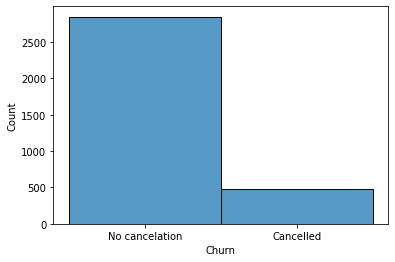

In [5]:
sns.histplot(data['Churn'],discrete=True)
plt.xticks([0,1],['No cancelation','Cancelled']);

In [17]:
len(data[data['Churn'] == 1]) / len(data)

0.14491449144914492

Churn rate in thes dataset is 14.49%.

## AccountWeeks
- number of weeks customer has had active account

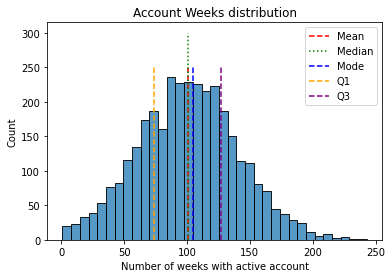

In [37]:
plt.title('Account Weeks distribution')
sns.histplot(data['AccountWeeks'])
plt.xlabel('Number of weeks with active account');
plt.vlines(data['AccountWeeks'].mean(),0,250,color='red',label='Mean' , linestyles='dashed')
plt.vlines(data['AccountWeeks'].median(),0,300,color='green',label='Median', linestyles='dotted')
plt.vlines(data['AccountWeeks'].mode()[0],0,250,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['AccountWeeks'].quantile(0.25),0,250,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['AccountWeeks'].quantile(0.75),0,250,color='purple',label='Q3', linestyles='dashed')
plt.legend();

## ContractRenewal
- 1 if customer recently renewed contract, 0 if not

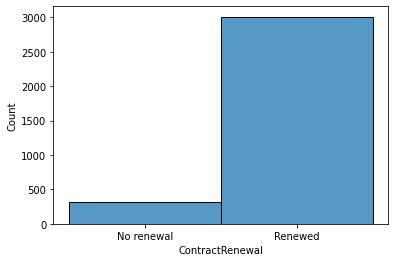

In [7]:
sns.histplot(data['ContractRenewal'],discrete=True)
plt.xticks([0,1],['No renewal','Renewed']);

## DataPlan
- 1 if customer has data plan, 0 if not

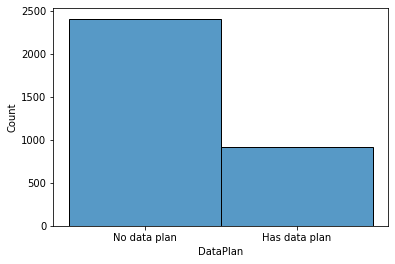

In [8]:
sns.histplot(data['DataPlan'],discrete=True)
plt.xticks([0,1],['No data plan','Has data plan']);

## DataUsage
- gigabytes of monthly data usage

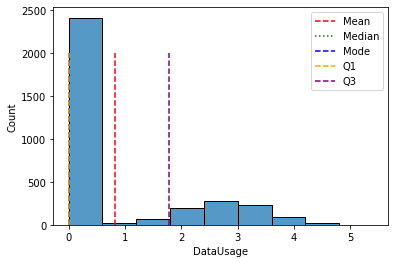

In [39]:
sns.histplot(data['DataUsage'],bins=9)
plt.vlines(data['DataUsage'].mean(),0,2000,color='red',label='Mean' , linestyles='dashed')
plt.vlines(data['DataUsage'].median(),0,2000,color='green',label='Median', linestyles='dotted')
plt.vlines(data['DataUsage'].mode()[0],0,2000,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['DataUsage'].quantile(0.25),0,2000,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['DataUsage'].quantile(0.75),0,2000,color='purple',label='Q3', linestyles='dashed')
plt.legend();

## CustServCalls
- number of calls into customer service

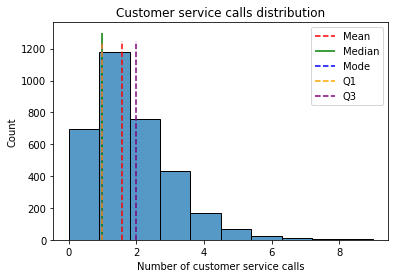

In [46]:
sns.histplot(data['CustServCalls'],bins=10)
plt.title('Customer service calls distribution')
plt.vlines(data['CustServCalls'].mean(),0,1250,color='red',label='Mean' , linestyles='dashed')
plt.vlines(data['CustServCalls'].median(),0,1300,color='green',label='Median', linestyles='solid')
plt.vlines(data['CustServCalls'].mode()[0],0,1250,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['CustServCalls'].quantile(0.25),0,1250,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['CustServCalls'].quantile(0.75),0,1250,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('Number of customer service calls')
plt.legend();

## DayMins
- average daytime minutes spend during calls per month

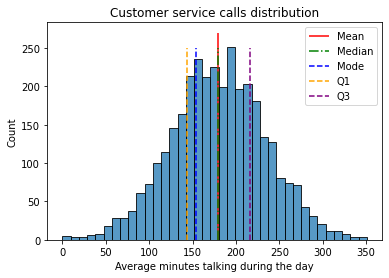

In [63]:
sns.histplot(data['DayMins'])
plt.title('Customer service calls distribution')
plt.vlines(data['DayMins'].mean(),0,270,color='red',label='Mean' , linestyles='solid')
plt.vlines(data['DayMins'].median(),0,250,color='green',label='Median', linestyles='dashdot')
plt.vlines(data['DayMins'].mode()[0],0,250,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['DayMins'].quantile(0.25),0,250,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['DayMins'].quantile(0.75),0,250,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('Average minutes talking during the day');
plt.legend();

## DayCalls
- average number of daytime calls

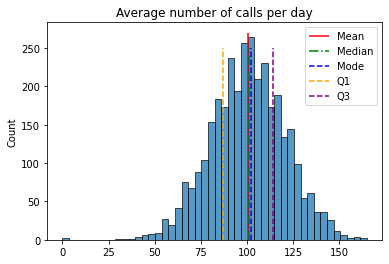

In [61]:
sns.histplot(data['DayCalls']);
plt.title('Average number of calls per day')
plt.vlines(data['DayCalls'].mean(),0,270,color='red',label='Mean' , linestyles='solid')
plt.vlines(data['DayCalls'].median(),0,250,color='green',label='Median', linestyles='dashdot')
plt.vlines(data['DayCalls'].mode()[0],0,250,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['DayCalls'].quantile(0.25),0,250,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['DayCalls'].quantile(0.75),0,250,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('');
plt.legend();

## MonthlyCharge
- average monthly bill

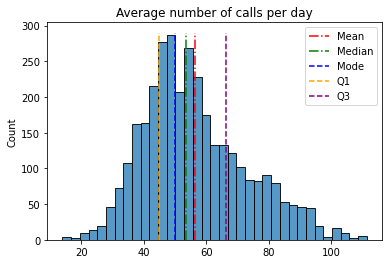

In [67]:
sns.histplot(data['MonthlyCharge']);
plt.title('Average number of calls per day')
plt.vlines(data['MonthlyCharge'].mean(),0,290,color='red',label='Mean' , linestyles='dashdot')
plt.vlines(data['MonthlyCharge'].median(),0,290,color='green',label='Median', linestyles='dashdot')
plt.vlines(data['MonthlyCharge'].mode()[0],0,290,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['MonthlyCharge'].quantile(0.25),0,290,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['MonthlyCharge'].quantile(0.75),0,290,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('');
plt.legend();

## OverageFee
- largest overage fee in last 12 months

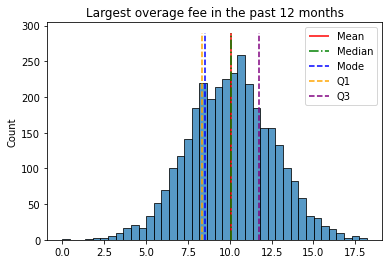

In [71]:
sns.histplot(data['OverageFee']);
plt.title('Largest overage fee in the past 12 months')
plt.vlines(data['OverageFee'].mean(),0,290,color='red',label='Mean' , linestyles='solid')
plt.vlines(data['OverageFee'].median(),0,290,color='green',label='Median', linestyles='dashdot')
plt.vlines(data['OverageFee'].mode()[0],0,290,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['OverageFee'].quantile(0.25),0,290,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['OverageFee'].quantile(0.75),0,290,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('');
plt.legend();

## RoamMins
- average number of roaming minutes

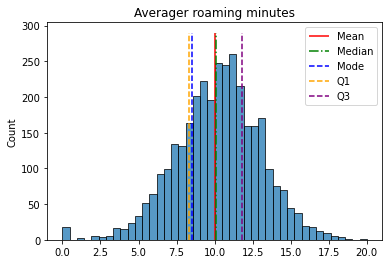

In [73]:
sns.histplot(data['RoamMins']);
plt.title('Averager roaming minutes')
plt.vlines(data['OverageFee'].mean(),0,290,color='red',label='Mean' , linestyles='solid')
plt.vlines(data['OverageFee'].median(),0,290,color='green',label='Median', linestyles='dashdot')
plt.vlines(data['OverageFee'].mode()[0],0,290,color='blue',label='Mode', linestyles='dashed')
plt.vlines(data['OverageFee'].quantile(0.25),0,290,color='orange',label='Q1', linestyles='dashed')
plt.vlines(data['OverageFee'].quantile(0.75),0,290,color='purple',label='Q3', linestyles='dashed')
plt.xlabel('');
plt.legend();